In [54]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
feature_names = df.columns
for i in range(len(feature_names)):
    print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 Date 			 <class 'str'>
1 	 Location 			 <class 'str'>
2 	 MinTemp 			 <class 'numpy.float64'>
3 	 MaxTemp 			 <class 'numpy.float64'>
4 	 Rainfall 			 <class 'numpy.float64'>
5 	 Evaporation 			 <class 'numpy.float64'>
6 	 Sunshine 			 <class 'numpy.float64'>
7 	 WindGustDir 			 <class 'str'>
8 	 WindGustSpeed 			 <class 'numpy.float64'>
9 	 WindDir9am 			 <class 'str'>
10 	 WindDir3pm 			 <class 'str'>
11 	 WindSpeed9am 			 <class 'numpy.float64'>
12 	 WindSpeed3pm 			 <class 'numpy.float64'>
13 	 Humidity9am 			 <class 'numpy.float64'>
14 	 Humidity3pm 			 <class 'numpy.float64'>
15 	 Pressure9am 			 <class 'numpy.float64'>
16 	 Pressure3pm 			 <class 'numpy.float64'>
17 	 Cloud9am 			 <class 'numpy.float64'>
18 	 Cloud3pm 			 <class 'numpy.float64'>
19 	 Temp9am 			 <class 'numpy.float64'>
20 	 Temp3pm 			 <class 'numpy.float64'>
21 	 RainToday 			 <class 'str'>
22 	 RainTomorrow 			 <class 'str'>


# Dummy Data Gen

In [33]:
def gen_cluster(n, max_mean=10, max_var=3):
    means = np.random.rand(2) * max_mean
    var = np.random.rand(2) * max_var
    x = np.random.normal(means[0], var[0], n).reshape(n,1)
    y = np.random.normal(means[1], var[1], n).reshape(n,1)
    data = np.concatenate([x, y], axis=1)
    return data

def gen_data(num_clusts=3, n=100):
    pos_data = gen_cluster(n, max_mean=10, max_var=5)
    neg_data = gen_cluster(n, max_mean=10, max_var=5)
    for i in range(num_clusts-1):
        pos_data = np.concatenate([pos_data, gen_cluster(n, max_mean=10, max_var=5)])
        neg_data = np.concatenate([neg_data, gen_cluster(n, max_mean=10, max_var=5)])
    data = np.concatenate([pos_data, neg_data])
    labels = [1] * (n * num_clusts) + [0] * (n * num_clusts)
    return data, labels

(600, 2)


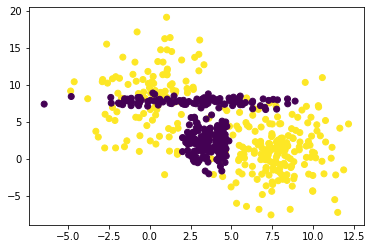

In [53]:
data, labels = gen_data(num_clusts=3, n=100)
print(data.shape)
plt.scatter(data[:,0], data[:,1], c=labels)

In [ ]:
# ideas: just do kmeans first and use that straight as labels, make it optimize with other class decreasing affinity, 
# pick out of many iters that which doens't have other class with high affinity
# optimize with two sets of clusters at once, each trying to only have those from their stuff
# penalty to including points of other cluster but still trying to optimize normally

In [78]:
import gmm
%aimport gmm

In [88]:
alg = gmm.GMM(n_components=4, init='random')

=== ITER 0 ===


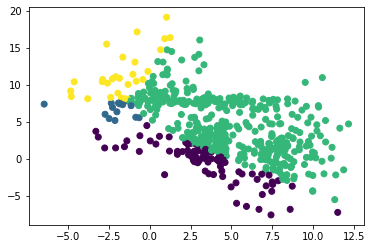

prob [[2.47199809e-10 1.66017162e-10 1.71581160e-18 ... 8.09552851e-06
  4.54979610e-07 3.34348568e-08]
 [1.48950170e-14 4.94630934e-16 3.75463713e-19 ... 1.34892790e-09
  5.70150031e-10 4.38087997e-10]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.99991903e-01
  9.99999544e-01 9.99999966e-01]
 [3.18256286e-21 1.00725560e-23 3.54379672e-22 ... 2.29038874e-16
  6.41805499e-16 4.13626156e-15]]
theta new {'num_dims': 2, 'a': array([0.15384651, 0.02565791, 0.77301708, 0.04747849]), 'mu': array([[ 3.52751132, -0.37154753],
       [-2.14502747,  6.83309586],
       [ 4.90359681,  4.19704284],
       [-1.6280749 , 11.24280915]]), 'cov': array([[[ 7.15631278, -5.45268808],
        [-5.45268808,  6.50828164]],

       [[ 1.9964357 , -0.36501254],
        [-0.36501254,  1.0819162 ]],

       [[ 8.46170515, -5.89154747],
        [-5.89154747, 12.95696841]],

       [[ 2.39252439,  2.57615018],
        [ 2.57615018,  9.35667865]]])}
likelihood -3191.333084000845
MONOTONIC: True
=== ITER 1 =

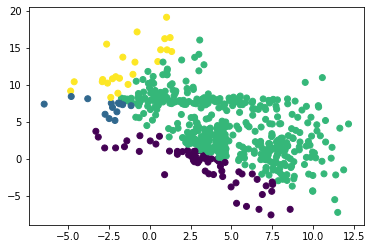

prob [[7.77772824e-04 7.52161547e-04 6.72355854e-08 ... 2.65025751e-02
  1.00156297e-02 3.70453427e-03]
 [1.00724476e-11 2.25527456e-14 4.17071570e-12 ... 3.13135950e-08
  1.54084930e-07 1.03503869e-06]
 [9.99222227e-01 9.99247838e-01 9.99999933e-01 ... 9.73497394e-01
  9.89984216e-01 9.96294431e-01]
 [1.52150915e-18 3.42127162e-22 7.46755358e-19 ... 9.40755724e-13
  3.88253554e-12 3.76639061e-11]]
theta new {'num_dims': 2, 'a': array([0.13421316, 0.02605039, 0.79359209, 0.04614436]), 'mu': array([[ 3.61012288,  0.02424605],
       [-1.80573109,  7.23638932],
       [ 4.80654019,  4.00304393],
       [-1.10510469, 11.43780589]]), 'cov': array([[[ 7.18813544, -4.94725446],
        [-4.94725446,  6.3492779 ]],

       [[ 2.24932951, -0.25159262],
        [-0.25159262,  0.97102742]],

       [[ 9.00510625, -5.89017522],
        [-5.89017522, 13.58412284]],

       [[ 3.42542538,  3.6778578 ],
        [ 3.6778578 , 11.94353071]]])}
likelihood -3165.289914547212
MONOTONIC: True
=== ITER 2 =

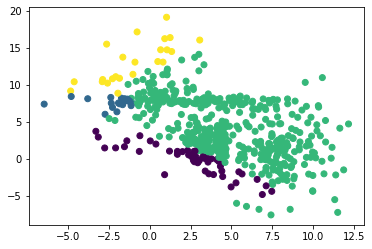

prob [[6.59588411e-03 6.72134685e-03 1.04689006e-05 ... 6.45566753e-02
  3.32988269e-02 1.64911930e-02]
 [5.79883540e-12 7.43416224e-15 1.22012659e-10 ... 6.22991609e-09
  6.10695730e-08 8.03497631e-07]
 [9.93404116e-01 9.93278653e-01 9.99989531e-01 ... 9.35443318e-01
  9.66701109e-01 9.83507988e-01]
 [6.30996682e-14 1.27895199e-16 7.90524981e-14 ... 8.71582531e-10
  2.73445580e-09 1.59241194e-08]]
theta new {'num_dims': 2, 'a': array([0.12771443, 0.03024932, 0.79313753, 0.04889873]), 'mu': array([[ 3.75501262,  0.34084458],
       [-1.48781519,  7.52281267],
       [ 4.79406441,  3.86061802],
       [-0.73605933, 11.51865146]]), 'cov': array([[[ 6.69544634, -4.18435251],
        [-4.18435251,  5.60934495]],

       [[ 2.31980584, -0.11500195],
        [-0.11500195,  0.72128165]],

       [[ 9.2224445 , -5.75040411],
        [-5.75040411, 13.79001957]],

       [[ 3.87723447,  3.91020213],
        [ 3.91020213, 12.58164077]]])}
likelihood -3151.9357313710316
MONOTONIC: True
=== ITER 3 

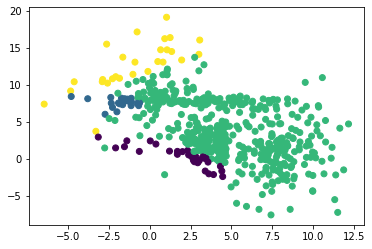

prob [[1.66821756e-02 1.73141377e-02 6.57650006e-05 ... 1.00307531e-01
  5.80822619e-02 3.16564252e-02]
 [1.92696009e-14 3.27661496e-18 7.64009342e-11 ... 2.40429873e-11
  8.47423746e-10 4.13335237e-08]
 [9.83317824e-01 9.82685862e-01 9.99934235e-01 ... 8.99692449e-01
  9.41917681e-01 9.68343271e-01]
 [7.70125652e-12 4.08175744e-14 1.30898703e-11 ... 2.03088762e-08
  5.64512087e-08 2.62357149e-07]]
theta new {'num_dims': 2, 'a': array([0.12767925, 0.03744759, 0.78231665, 0.05255651]), 'mu': array([[ 3.90374742,  0.61385698],
       [-1.13795163,  7.70098093],
       [ 4.82392928,  3.7409881 ],
       [-0.54665448, 11.47225893]]), 'cov': array([[[ 5.88404301, -3.30686383],
        [-3.30686383,  4.52990558]],

       [[ 2.35631518, -0.0196032 ],
        [-0.0196032 ,  0.48274172]],

       [[ 9.3172675 , -5.57333219],
        [-5.57333219, 13.97204866]],

       [[ 3.98174209,  3.78972885],
        [ 3.78972885, 12.6536352 ]]])}
likelihood -3139.1981607546504
MONOTONIC: True
=== ITER 4 

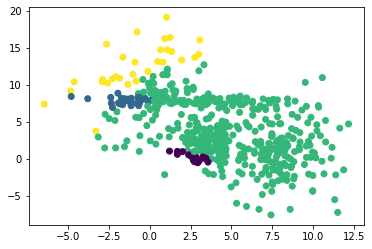

prob [[2.90690383e-02 3.04003501e-02 1.22622011e-04 ... 1.40978399e-01
  8.49685270e-02 4.67320460e-02]
 [2.64214189e-19 1.08941695e-24 4.50758323e-12 ... 7.17492368e-16
  2.31338579e-13 1.08861153e-10]
 [9.70930962e-01 9.69599650e-01 9.99877378e-01 ... 8.59021489e-01
  9.15031181e-01 9.53266746e-01]
 [9.53182907e-11 8.16974833e-13 1.68176606e-10 ... 1.11644016e-07
  2.91951623e-07 1.20836714e-06]]
theta new {'num_dims': 2, 'a': array([0.13313558, 0.047345  , 0.76310974, 0.05640968]), 'mu': array([[ 4.04143072,  0.84268589],
       [-0.76618773,  7.80126101],
       [ 4.88310763,  3.63490467],
       [-0.48229528, 11.36269113]]), 'cov': array([[[ 4.86720598, -2.45311816],
        [-2.45311816,  3.44800506]],

       [[ 2.36302088,  0.02109867],
        [ 0.02109867,  0.32058535]],

       [[ 9.37410634, -5.38198188],
        [-5.38198188, 14.14138822]],

       [[ 4.0340375 ,  3.6986122 ],
        [ 3.6986122 , 12.75140416]]])}
likelihood -3125.3699458758174
MONOTONIC: True
=== ITER 5 

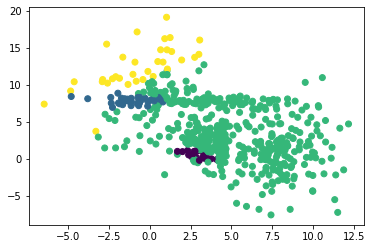

prob [[4.33614081e-02 4.45734084e-02 1.16624629e-04 ... 1.95746843e-01
  1.18693511e-01 6.27449037e-02]
 [1.31659924e-26 2.31738254e-34 3.33279084e-14 ... 1.17122305e-22
  9.76341922e-19 1.26395861e-14]
 [9.56638591e-01 9.55426592e-01 9.99883375e-01 ... 8.04252855e-01
  8.81305716e-01 9.37252073e-01]
 [4.14182579e-10 4.67563908e-12 7.11113242e-10 ... 3.02192392e-07
  7.73530114e-07 3.02315666e-06]]
theta new {'num_dims': 2, 'a': array([0.14415711, 0.05827241, 0.73697802, 0.06059247]), 'mu': array([[ 4.14439204,  1.03460902],
       [-0.41040975,  7.84405714],
       [ 4.96291037,  3.54185129],
       [-0.49775022, 11.21978168]]), 'cov': array([[[ 3.81482875, -1.75222359],
        [-1.75222359,  2.63689829]],

       [[ 2.35998876,  0.01903324],
        [ 0.01903324,  0.23893302]],

       [[ 9.44560377, -5.20788374],
        [-5.20788374, 14.29773148]],

       [[ 4.13996777,  3.71540169],
        [ 3.71540169, 12.92105548]]])}
likelihood -3112.0577153356076
MONOTONIC: True
=== ITER 6 

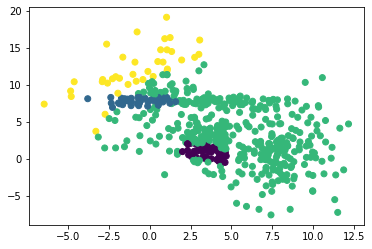

prob [[5.96425033e-02 5.65408281e-02 8.19189906e-05 ... 2.72703338e-01
  1.67185825e-01 8.47774293e-02]
 [2.47217134e-33 2.77329544e-43 5.51176224e-16 ... 4.44621028e-29
  8.78855055e-24 2.75127268e-18]
 [9.40357496e-01 9.43459172e-01 9.99918079e-01 ... 7.27296111e-01
  8.32812748e-01 9.15217089e-01]
 [1.07609134e-09 1.46333685e-11 1.82703553e-09 ... 5.50460393e-07
  1.42629321e-06 5.48129844e-06]]
theta new {'num_dims': 2, 'a': array([0.15965029, 0.06790784, 0.70709703, 0.06534484]), 'mu': array([[ 4.18010725,  1.21485645],
       [-0.10168567,  7.85128488],
       [ 5.05785934,  3.45999667],
       [-0.54975226, 11.05932467]]), 'cov': array([[[ 2.90792286e+00, -1.22734419e+00],
        [-1.22734419e+00,  2.09157109e+00]],

       [[ 2.42651985e+00, -1.83693793e-04],
        [-1.83693793e-04,  2.00585457e-01]],

       [[ 9.54077122e+00, -5.09266271e+00],
        [-5.09266271e+00,  1.44935756e+01]],

       [[ 4.25795654e+00,  3.75860633e+00],
        [ 3.75860633e+00,  1.30348327e+01

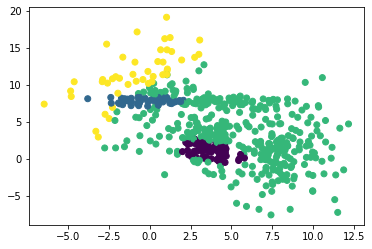

prob [[7.60445316e-02 6.05334286e-02 5.40121215e-05 ... 3.71653658e-01
  2.36761838e-01 1.18993919e-01]
 [2.06936199e-37 9.69662684e-49 1.35746394e-16 ... 2.89779151e-33
  5.39169779e-27 1.52765469e-20]
 [9.23955466e-01 9.39466571e-01 9.99945984e-01 ... 6.28345546e-01
  7.63236019e-01 8.80997712e-01]
 [2.12829937e-09 3.32281248e-11 3.61936661e-09 ... 7.95771422e-07
  2.14234432e-06 8.36898247e-06]]
theta new {'num_dims': 2, 'a': array([0.17703913, 0.07587875, 0.67657526, 0.07050685]), 'mu': array([[ 4.14599928,  1.39054693],
       [ 0.16506575,  7.84289061],
       [ 5.16798929,  3.38004887],
       [-0.59765635, 10.89527687]]), 'cov': array([[[ 2.20513745, -0.83869846],
        [-0.83869846,  1.73835488]],

       [[ 2.63748926, -0.01981056],
        [-0.01981056,  0.17870723]],

       [[ 9.63344632, -5.04055752],
        [-5.04055752, 14.74393335]],

       [[ 4.30797542,  3.74804091],
        [ 3.74804091, 13.06068   ]]])}
likelihood -3088.2434589119484
MONOTONIC: True
=== ITER 8 

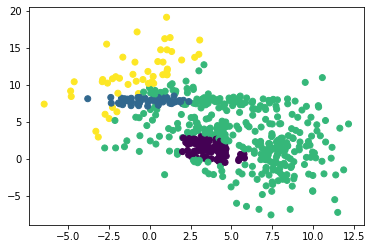

prob [[8.74699493e-02 5.16208670e-02 3.95165148e-05 ... 4.79607340e-01
  3.27036278e-01 1.71478354e-01]
 [5.74133335e-40 3.41768487e-52 1.58701143e-16 ... 3.70476025e-36
  3.66084414e-29 5.21661515e-22]
 [9.12530047e-01 9.48379133e-01 9.99960478e-01 ... 5.20391648e-01
  6.72960865e-01 8.28510020e-01]
 [3.57476202e-09 6.15149556e-11 5.91039913e-09 ... 1.01285067e-06
  2.85673783e-06 1.16265856e-05]]
theta new {'num_dims': 2, 'a': array([0.19327818, 0.08313145, 0.64761717, 0.07597319]), 'mu': array([[ 4.06860168,  1.55345382],
       [ 0.4161366 ,  7.83067078],
       [ 5.29216259,  3.28910165],
       [-0.62308073, 10.72795092]]), 'cov': array([[[ 1.64213768, -0.53479584],
        [-0.53479584,  1.52191172]],

       [[ 3.01692442, -0.03423831],
        [-0.03423831,  0.1622318 ]],

       [[ 9.6953727 , -5.01576718],
        [-5.01576718, 14.99511554]],

       [[ 4.26847344,  3.67670659],
        [ 3.67670659, 13.08580155]]])}
likelihood -3076.013981898702
MONOTONIC: True
=== ITER 9 =

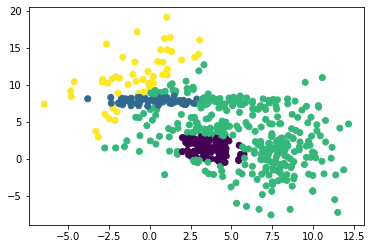

prob [[8.29381546e-02 2.93753853e-02 3.00515680e-05 ... 5.79891261e-01
  4.30307900e-01 2.47954233e-01]
 [1.97489902e-42 1.64893982e-55 1.94379966e-16 ... 5.77014580e-39
  2.75783354e-31 1.84693054e-23]
 [9.17061840e-01 9.70624615e-01 9.99969940e-01 ... 4.20107492e-01
  5.69688475e-01 7.52030294e-01]
 [5.68548177e-09 1.04074229e-10 8.57295771e-09 ... 1.24742527e-06
  3.62467926e-06 1.54733530e-05]]
theta new {'num_dims': 2, 'a': array([0.20676319, 0.09054264, 0.62074429, 0.08194988]), 'mu': array([[ 3.97903089,  1.69387574],
       [ 0.6745282 ,  7.81967773],
       [ 5.42627262,  3.17878776],
       [-0.62470488, 10.55375984]]), 'cov': array([[[ 1.16723163, -0.29080953],
        [-0.29080953,  1.41126421]],

       [[ 3.56947527, -0.04171812],
        [-0.04171812,  0.14808342]],

       [[ 9.70256004, -4.96782463],
        [-4.96782463, 15.16379886]],

       [[ 4.15988246,  3.56063679],
        [ 3.56063679, 13.16314987]]])}
likelihood -3061.8393913680866
MONOTONIC: True
=== ITER 10

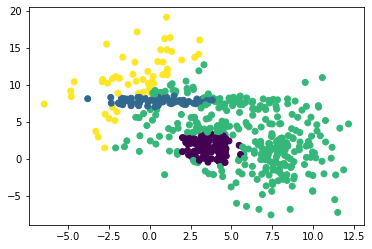

prob [[5.25937083e-02 7.50305432e-03 1.57518616e-05 ... 6.62083209e-01
  5.34177892e-01 3.50041629e-01]
 [2.38895362e-45 2.02949157e-59 1.24139542e-16 ... 4.01184978e-42
  9.95681948e-34 3.48771443e-25]
 [9.47406282e-01 9.92496946e-01 9.99984236e-01 ... 3.37915203e-01
  4.65817523e-01 6.49938195e-01]
 [9.31187046e-09 1.74108830e-10 1.19265620e-08 ... 1.58721987e-06
  4.58523421e-06 2.01762483e-05]]
theta new {'num_dims': 2, 'a': array([0.2179153 , 0.09855979, 0.59479063, 0.08873429]), 'mu': array([[ 3.9116328 ,  1.80391191],
       [ 0.95024454,  7.81135358],
       [ 5.5623483 ,  3.04763402],
       [-0.60370362, 10.37535353]]), 'cov': array([[[ 0.81073818, -0.1127578 ],
        [-0.1127578 ,  1.38720324]],

       [[ 4.31406466, -0.04160374],
        [-0.04160374,  0.13640002]],

       [[ 9.64606771, -4.8550766 ],
        [-4.8550766 , 15.18700008]],

       [[ 4.00024596,  3.40670398],
        [ 3.40670398, 13.27902865]]])}
likelihood -3047.1628594161043
MONOTONIC: True
=== ITER 11

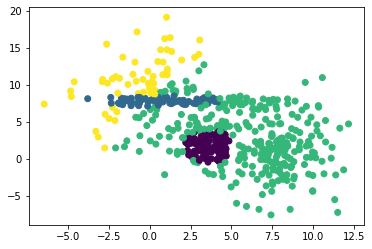

prob [[1.80276259e-02 6.13445065e-04 3.71509574e-06 ... 7.21657981e-01
  6.24030125e-01 4.65680738e-01]
 [1.64669232e-48 1.21310767e-63 4.41310637e-17 ... 2.15485036e-45
  2.66352299e-36 4.77396852e-27]
 [9.81972359e-01 9.99386555e-01 9.99996269e-01 ... 2.78339883e-01
  3.75963982e-01 5.34293558e-01]
 [1.54385644e-08 2.87136090e-10 1.62084284e-08 ... 2.13526563e-06
  5.89284088e-06 2.57039408e-05]]
theta new {'num_dims': 2, 'a': array([0.22712858, 0.10735447, 0.5691089 , 0.09640804]), 'mu': array([[ 3.88834936,  1.88266954],
       [ 1.24297012,  7.80561255],
       [ 5.68992358,  2.89430384],
       [-0.55862472, 10.20236025]]), 'cov': array([[[ 6.16698163e-01, -4.20701935e-03],
        [-4.20701935e-03,  1.41918367e+00]],

       [[ 5.29431804e+00, -3.30658329e-02],
        [-3.30658329e-02,  1.27886080e-01]],

       [[ 9.52943091e+00, -4.65699072e+00],
        [-4.65699072e+00,  1.50260060e+01]],

       [[ 3.79412142e+00,  3.21492716e+00],
        [ 3.21492716e+00,  1.33895913e+01

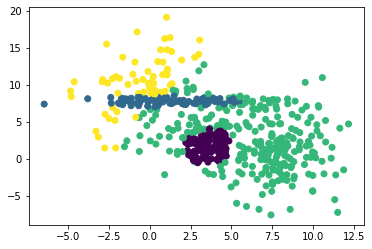

prob [[5.07739182e-03 3.75926306e-05 7.42644200e-07 ... 7.59453138e-01
  6.88800317e-01 5.65534514e-01]
 [2.35525855e-51 1.99023720e-67 1.34964632e-17 ... 3.10383644e-48
  1.46438546e-38 1.03094608e-28]
 [9.94922584e-01 9.99962407e-01 9.99999237e-01 ... 2.40543877e-01
  3.11191983e-01 4.34433282e-01]
 [2.39275563e-08 4.41227671e-10 2.05802480e-08 ... 2.98517028e-06
  7.69985595e-06 3.22042426e-05]]
theta new {'num_dims': 2, 'a': array([0.23338999, 0.1168349 , 0.54499907, 0.10477604]), 'mu': array([[ 3.89289093,  1.93747298],
       [ 1.55048359,  7.80210695],
       [ 5.80319386,  2.71573722],
       [-0.49175099, 10.04542378]]), 'cov': array([[[ 0.5311411 ,  0.05811483],
        [ 0.05811483,  1.46804915]],

       [[ 6.52304616, -0.01699225],
        [-0.01699225,  0.12257559]],

       [[ 9.35098941, -4.38300762],
        [-4.38300762, 14.64116949]],

       [[ 3.56026864,  2.9978827 ],
        [ 2.9978827 , 13.45315219]]])}
likelihood -3027.609294611754
MONOTONIC: True
=== ITER 13 

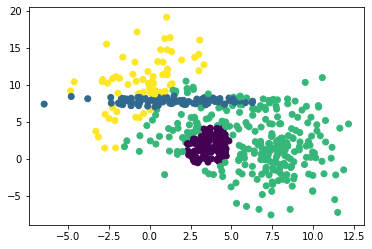

prob [[2.10354400e-03 5.18128534e-06 2.79296060e-07 ... 7.81953911e-01
  7.29651949e-01 6.33160821e-01]
 [1.99800303e-53 3.50358384e-70 5.38174918e-18 ... 2.94654432e-50
  3.52731479e-40 6.45546868e-30]
 [9.97896422e-01 9.99994818e-01 9.99999697e-01 ... 2.18041929e-01
  2.70337971e-01 3.66798889e-01]
 [3.35486117e-08 6.02928408e-10 2.37545595e-08 ... 4.15940696e-06
  1.00801755e-05 4.02895609e-05]]
theta new {'num_dims': 2, 'a': array([0.23700609, 0.12614022, 0.5232332 , 0.1136205 ]), 'mu': array([[ 3.90446694,  1.97452533],
       [ 1.85975135,  7.80019887],
       [ 5.90279715,  2.52059129],
       [-0.41882734,  9.90656447]]), 'cov': array([[[ 4.91685302e-01,  9.40895766e-02],
        [ 9.40895766e-02,  1.51120334e+00]],

       [[ 7.77755332e+00, -4.42566336e-03],
        [-4.42566336e-03,  1.19914018e-01]],

       [[ 9.11956060e+00, -4.06618942e+00],
        [-4.06618942e+00,  1.40502684e+01]],

       [[ 3.36992209e+00,  2.79412616e+00],
        [ 2.79412616e+00,  1.34478478e+01

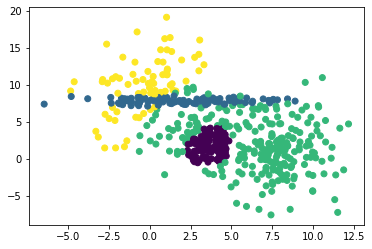

prob [[1.25317449e-03 1.55990008e-06 1.69558271e-07 ... 7.94983811e-01
  7.53993672e-01 6.74642252e-01]
 [1.66739570e-54 1.27734560e-71 3.84619443e-18 ... 2.47905737e-51
  4.87686854e-41 1.48377676e-30]
 [9.98746777e-01 9.99998439e-01 9.99999801e-01 ... 2.05010247e-01
  2.45992611e-01 3.25305054e-01]
 [4.82079839e-08 8.58629740e-10 2.95307353e-08 ... 5.94225980e-06
  1.37177068e-05 5.26942458e-05]]
theta new {'num_dims': 2, 'a': array([0.23897283, 0.13357761, 0.50487982, 0.12256974]), 'mu': array([[ 3.91467089,  1.99986546],
       [ 2.11627298,  7.79792747],
       [ 5.99396061,  2.33251465],
       [-0.3548386 ,  9.78347128]]), 'cov': array([[[ 4.71219545e-01,  1.14731538e-01],
        [ 1.14731538e-01,  1.54329140e+00]],

       [[ 8.67557191e+00, -9.50681343e-03],
        [-9.50681343e-03,  1.19648461e-01]],

       [[ 8.84385494e+00, -3.71258105e+00],
        [-3.71258105e+00,  1.33592413e+01]],

       [[ 3.27155414e+00,  2.62705158e+00],
        [ 2.62705158e+00,  1.33795343e+01

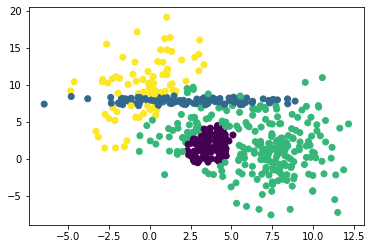

prob [[9.17164862e-04 7.53010897e-07 1.28513267e-07 ... 8.02447602e-01
  7.68613447e-01 7.00485372e-01]
 [2.10286607e-54 1.69850022e-71 6.33752447e-18 ... 2.45038050e-51
  4.91122761e-41 1.51193204e-30]
 [9.99082754e-01 9.99999245e-01 9.99999825e-01 ... 1.97543305e-01
  2.31366367e-01 2.99440118e-01]
 [8.12666280e-08 1.52499345e-09 4.68545094e-08 ... 9.09296148e-06
  2.01858418e-05 7.45102676e-05]]
theta new {'num_dims': 2, 'a': array([0.2401013 , 0.13860049, 0.49033194, 0.13096628]), 'mu': array([[ 3.92164493,  2.01858305],
       [ 2.28807738,  7.79426179],
       [ 6.08103674,  2.17060842],
       [-0.30178192,  9.67476216]]), 'cov': array([[[ 0.45979394,  0.12640217],
        [ 0.12640217,  1.56613542]],

       [[ 9.16910225, -0.03026426],
        [-0.03026426,  0.12155545]],

       [[ 8.53506581, -3.32822916],
        [-3.32822916, 12.69732355]],

       [[ 3.2384266 ,  2.48716123],
        [ 2.48716123, 13.29082674]]])}
likelihood -3015.3666973587224
MONOTONIC: True
=== ITER 16

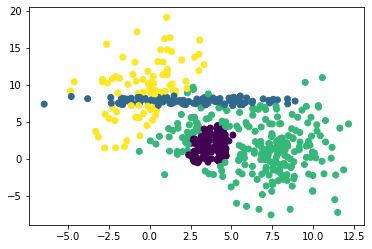

prob [[7.53122270e-04 4.79367426e-07 1.08311297e-07 ... 8.07010154e-01
  7.78091111e-01 7.18038675e-01]
 [2.80699124e-53 5.12330265e-70 2.15077803e-17 ... 2.09616588e-50
  2.79822095e-40 5.62461680e-30]
 [9.99246726e-01 9.99999517e-01 9.99999805e-01 ... 1.92975453e-01
  2.21877994e-01 2.81851856e-01]
 [1.51739608e-07 3.14241251e-09 8.67519907e-08 ... 1.43922711e-05
  3.08947308e-05 1.09468857e-04]]
theta new {'num_dims': 2, 'a': array([0.2410038 , 0.14206673, 0.47861357, 0.1383159 ]), 'mu': array([[ 3.92544062,  2.03392489],
       [ 2.39816708,  7.7899341 ],
       [ 6.16325549,  2.03693851],
       [-0.25766839,  9.57632946]]), 'cov': array([[[ 0.45371961,  0.13267855],
        [ 0.13267855,  1.58280327]],

       [[ 9.43856486, -0.05688524],
        [-0.05688524,  0.12496745]],

       [[ 8.22103526, -2.95475554],
        [-2.95475554, 12.13582656]],

       [[ 3.23303554,  2.36397737],
        [ 2.36397737, 13.23602168]]])}
likelihood -3013.540568055035
MONOTONIC: True
=== ITER 17 

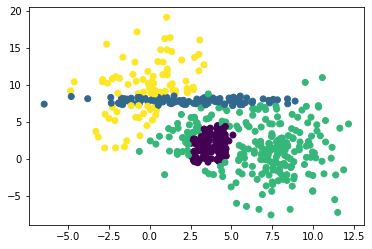

prob [[6.68667812e-04 3.67437817e-07 9.84753568e-08 ... 8.10326053e-01
  7.85090684e-01 7.31429660e-01]
 [1.30107680e-51 8.01542962e-68 1.02373547e-16 ... 5.82670373e-49
  4.08188682e-39 4.20308842e-29]
 [9.99331047e-01 9.99999626e-01 9.99999738e-01 ... 1.89651444e-01
  2.14862454e-01 2.68410874e-01]
 [2.84689675e-07 6.60891682e-09 1.63311362e-07 ... 2.25035271e-05
  4.68621091e-05 1.59466035e-04]]
theta new {'num_dims': 2, 'a': array([0.24209953, 0.14474559, 0.46867155, 0.14448333]), 'mu': array([[ 3.92643886,  2.04742521],
       [ 2.474421  ,  7.78565744],
       [ 6.23893442,  1.9273334 ],
       [-0.2203552 ,  9.48505637]]), 'cov': array([[[ 0.4515662 ,  0.1356308 ],
        [ 0.1356308 ,  1.59616078]],

       [[ 9.60965531, -0.08356792],
        [-0.08356792,  0.12919605]],

       [[ 7.92943762, -2.62965066],
        [-2.62965066, 11.69185801]],

       [[ 3.23579088,  2.25324983],
        [ 2.25324983, 13.24336639]]])}
likelihood -3012.1701523078027
MONOTONIC: True
=== ITER 18

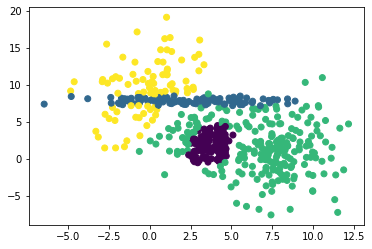

prob [[6.33264620e-04 3.25784080e-07 9.65459980e-08 ... 8.13252188e-01
  7.90946904e-01 7.42666320e-01]
 [8.56558095e-50 1.99398606e-65 5.10889611e-16 ... 2.34247054e-47
  7.95546420e-38 3.87854688e-28]
 [9.99366223e-01 9.99999661e-01 9.99999610e-01 ... 1.86713758e-01
  2.08984164e-01 2.57108136e-01]
 [5.12305704e-07 1.33140785e-08 2.92981058e-07 ... 3.40540259e-05
  6.89323145e-05 2.25544427e-04]]
theta new {'num_dims': 2, 'a': array([0.24361041, 0.14697587, 0.45985143, 0.14956229]), 'mu': array([[ 3.92504486,  2.05952268],
       [ 2.53188366,  7.78171244],
       [ 6.30804465,  1.83747835],
       [-0.18819604,  9.40027718]]), 'cov': array([[[ 0.45265192,  0.13650896],
        [ 0.13650896,  1.60844879]],

       [[ 9.73619518, -0.10847488],
        [-0.10847488,  0.13377344]],

       [[ 7.67191482, -2.36489162],
        [-2.36489162, 11.35659761]],

       [[ 3.24028463,  2.15183061],
        [ 2.15183061, 13.30965689]]])}
likelihood -3011.121200480816
MONOTONIC: True
=== ITER 19 

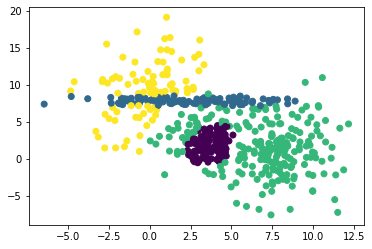

prob [[6.34799377e-04 3.26424183e-07 1.02157207e-07 ... 8.16143970e-01
  7.96231722e-01 7.52608322e-01]
 [5.05151186e-48 4.29037386e-63 2.33003858e-15 ... 8.84974239e-46
  1.46815490e-36 3.42161548e-27]
 [9.99364325e-01 9.99999648e-01 9.99999403e-01 ... 1.83806343e-01
  2.03670357e-01 2.47083165e-01]
 [8.75892817e-07 2.53160069e-08 4.94775349e-07 ... 4.96867647e-05
  9.79204232e-05 3.08512982e-04]]
theta new {'num_dims': 2, 'a': array([0.24560419, 0.14888265, 0.45176956, 0.15374359]), 'mu': array([[ 3.92165662,  2.07021555],
       [ 2.57716725,  7.77817509],
       [ 6.37193402,  1.76338256],
       [-0.1599593 ,  9.32206404]]), 'cov': array([[[ 0.45648557,  0.13606063],
        [ 0.13606063,  1.62110002]],

       [[ 9.8389435 , -0.13130605],
        [-0.13130605,  0.13841422]],

       [[ 7.44633927, -2.15428005],
        [-2.15428005, 11.11129287]],

       [[ 3.24528543,  2.05693059],
        [ 2.05693059, 13.41757555]]])}
likelihood -3010.2866330449615
MONOTONIC: True
=== ITER 20

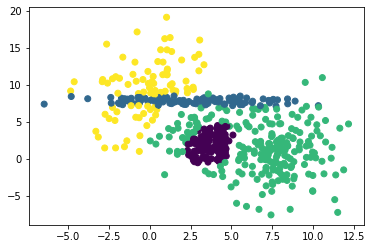

prob [[6.67853392e-04 3.61881354e-07 1.15908841e-07 ... 8.19114454e-01
  8.01172662e-01 7.61627123e-01]
 [2.18519365e-46 6.13423016e-61 9.21874341e-15 ... 2.58714672e-44
  2.19928444e-35 2.57577535e-26]
 [9.99330720e-01 9.99999593e-01 9.99999094e-01 ... 1.80815526e-01
  1.98692763e-01 2.37963897e-01]
 [1.42649288e-06 4.55083144e-08 7.90546431e-07 ... 7.00198876e-05
  1.34574898e-04 4.08980272e-04]]
theta new {'num_dims': 2, 'a': array([0.24805902, 0.15052304, 0.44417876, 0.15723918]), 'mu': array([[ 3.91666448,  2.07948147],
       [ 2.61331058,  7.77506092],
       [ 6.43247278,  1.70136273],
       [-0.13464361,  9.25004823]]), 'cov': array([[[ 0.46260162,  0.1347215 ],
        [ 0.1347215 ,  1.63486925]],

       [[ 9.9254729 , -0.15208321],
        [-0.15208321,  0.14294076]],

       [[ 7.24441885, -1.98475345],
        [-1.98475345, 10.93545629]],

       [[ 3.25073155,  1.9666887 ],
        [ 1.9666887 , 13.54995108]]])}
likelihood -3009.5835779769045
MONOTONIC: True
=== ITER 21

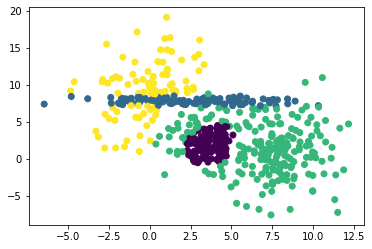

prob [[7.30029704e-04 4.34125761e-07 1.39219103e-07 ... 8.22199864e-01
  8.05892117e-01 7.69955951e-01]
 [6.43437248e-45 5.28145431e-59 3.11748090e-14 ... 5.42143068e-43
  2.51833089e-34 1.58386559e-25]
 [9.99267747e-01 9.99999488e-01 9.99998657e-01 ... 1.77704525e-01
  1.93928343e-01 2.29516693e-01]
 [2.22341982e-06 7.76987690e-08 1.20401400e-06 ... 9.56107101e-05
  1.79539931e-04 5.27355696e-04]]
theta new {'num_dims': 2, 'a': array([0.25091795, 0.151936  , 0.43690469, 0.16024136]), 'mu': array([[ 3.91044527,  2.08742663],
       [ 2.64209191,  7.77236732],
       [ 6.49146139,  1.64822733],
       [-0.11143052,  9.18330746]]), 'cov': array([[[ 0.47054097,  0.13274552],
        [ 0.13274552,  1.65009642]],

       [[ 9.99840075, -0.1708167 ],
        [-0.1708167 ,  0.14723973]],

       [[ 7.05687589, -1.84314605],
        [-1.84314605, 10.81108424]],

       [[ 3.25659605,  1.87992457],
        [ 1.87992457, 13.69479694]]])}
likelihood -3008.953879612268
MONOTONIC: True
=== ITER 22 

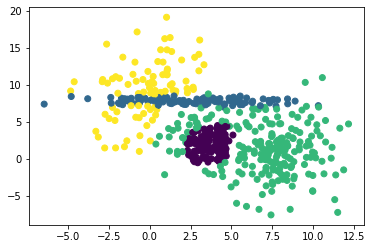

prob [[8.20472538e-04 5.51227940e-07 1.74293929e-07 ... 8.25435763e-01
  8.10505745e-01 7.77818898e-01]
 [1.27135361e-43 2.68700051e-57 9.02676513e-14 ... 7.99772194e-42
  2.17435469e-33 7.88079153e-25]
 [9.99176193e-01 9.99999322e-01 9.99998065e-01 ... 1.74437227e-01
  1.89260798e-01 2.21516960e-01]
 [3.33430987e-06 1.26705053e-07 1.76027920e-06 ... 1.27009391e-04
  2.33457072e-04 6.64141631e-04]]
theta new {'num_dims': 2, 'a': array([0.25412149, 0.1531544 , 0.4298179 , 0.16290621]), 'mu': array([[ 3.90335051,  2.09426782],
       [ 2.66485177,  7.77007792],
       [ 6.55038109,  1.60139068],
       [-0.08965967,  9.12066303]]), 'cov': array([[[ 0.47987156,  0.13029038],
        [ 0.13029038,  1.66693067]],

       [[10.05883723, -0.18749931],
        [-0.18749931,  0.15124149]],

       [[ 6.87570866, -1.71877268],
        [-1.71877268, 10.72410583]],

       [[ 3.2627999 ,  1.79567045],
        [ 1.79567045, 13.84517952]]])}
likelihood -3008.3587610059894
MONOTONIC: True
=== ITER 23

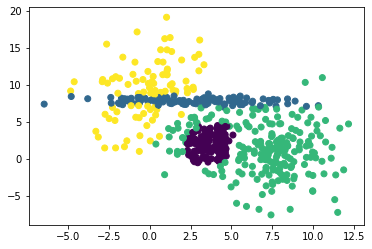

prob [[9.39080591e-04 7.26222417e-07 2.24070186e-07 ... 8.28877617e-01
  8.15143597e-01 7.85449700e-01]
 [1.71401492e-42 8.25605460e-56 2.26052391e-13 ... 8.40741154e-41
  1.43011909e-32 3.19880254e-24]
 [9.99056080e-01 9.99999075e-01 9.99997289e-01 ... 1.70957503e-01
  1.84559247e-01 2.13729950e-01]
 [4.83959592e-06 1.98655179e-07 2.48738934e-06 ... 1.64879719e-04
  2.97156303e-04 8.20350465e-04]]
theta new {'num_dims': 2, 'a': array([0.2576217 , 0.15420728, 0.42281905, 0.16535197]), 'mu': array([[ 3.89569502,  2.10026205],
       [ 2.6827206 ,  7.76816182],
       [ 6.61036553,  1.55885043],
       [-0.06879363,  9.0609583 ]]), 'cov': array([[[ 0.49020933,  0.12746889],
        [ 0.12746889,  1.68546419]],

       [[10.10768122, -0.20215464],
        [-0.20215464,  0.15490931]],

       [[ 6.6947301 , -1.60377758],
        [-1.60377758, 10.66421608]],

       [[ 3.26931179,  1.71293812],
        [ 1.71293812, 13.99763983]]])}
likelihood -3007.77207115079
MONOTONIC: True
=== ITER 24 =

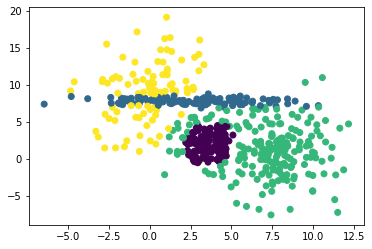

prob [[1.08603773e-03 9.76568896e-07 2.92132013e-07 ... 8.32598223e-01
  8.19943601e-01 7.93076934e-01]
 [1.62868092e-41 1.59856490e-54 4.96563801e-13 ... 6.47379739e-40
  7.32716752e-32 1.07729689e-23]
 [9.98907121e-01 9.99998722e-01 9.99996288e-01 ... 1.67191650e-01
  1.79684562e-01 2.05925245e-01]
 [6.84153911e-06 3.01616079e-07 3.41983406e-06 ... 2.10126354e-04
  3.71836872e-04 9.97821252e-04]]
theta new {'num_dims': 2, 'a': array([0.26138591, 0.15512037, 0.41582958, 0.16766414]), 'mu': array([[ 3.88775015,  2.10564773],
       [ 2.69666586,  7.76657622],
       [ 6.67226817,  1.5190906 ],
       [-0.0483912 ,  9.00321038]]), 'cov': array([[[ 0.5012292 ,  0.12437603],
        [ 0.12437603,  1.70579294]],

       [[10.14595193, -0.21485984],
        [-0.21485984,  0.15823204]],

       [[ 6.5093551 , -1.49265108],
        [-1.49265108, 10.62410738]],

       [[ 3.276202  ,  1.63071388],
        [ 1.63071388, 14.15077603]]])}
likelihood -3007.1748724735403
MONOTONIC: True
=== ITER 25

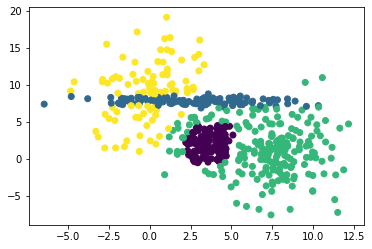

prob [[1.26155861e-03 1.32363366e-06 3.82623697e-07 ... 8.36680698e-01
  8.25042176e-01 8.00909761e-01]
 [1.13476670e-40 2.05432137e-53 9.72079586e-13 ... 3.77969242e-39
  3.00683013e-31 3.07401999e-23]
 [9.98728965e-01 9.99998230e-01 9.99995014e-01 ... 1.63055314e-01
  1.74498643e-01 1.97890894e-01]
 [9.47634024e-06 4.46574873e-07 4.60290944e-06 ... 2.63988229e-04
  4.59181116e-04 1.19934461e-03]]
theta new {'num_dims': 2, 'a': array([0.26539601, 0.15591675, 0.40878532, 0.16990191]), 'mu': array([[ 3.87974347,  2.11061431],
       [ 2.70750292,  7.76527149],
       [ 6.73674876,  1.48097146],
       [-0.02809621,  8.94666332]]), 'cov': array([[[ 0.51266609,  0.12110067],
        [ 0.12110067,  1.72803617]],

       [[10.17476362, -0.22574176],
        [-0.22574176,  0.16121825]],

       [[ 6.31617686, -1.38160584],
        [-1.38160584, 10.59866627]],

       [[ 3.2836371 ,  1.54805471],
        [ 1.54805471, 14.3043342 ]]])}
likelihood -3006.5518001128694
MONOTONIC: True
=== ITER 26

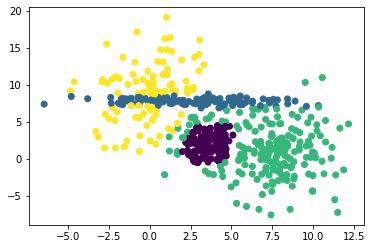

prob [[1.46579646e-03 1.79197453e-06 5.00181927e-07 ... 8.41213896e-01
  8.30569448e-01 8.09132198e-01]
 [6.04444597e-40 1.85083868e-52 1.72327682e-12 ... 1.73606576e-38
  1.01802709e-30 7.59878165e-23]
 [9.98521276e-01 9.99997559e-01 9.99993403e-01 ... 1.58458020e-01
  1.68869165e-01 1.89439204e-01]
 [1.29276862e-05 6.48733147e-07 6.09684538e-06 ... 3.28083686e-04
  5.61386726e-04 1.42859806e-03]]
theta new {'num_dims': 2, 'a': array([0.26964636, 0.15661748, 0.40163259, 0.17210358]), 'mu': array([[ 3.87186458e+00,  2.11529373e+00],
       [ 2.71590657e+00,  7.76419645e+00],
       [ 6.80434295e+00,  1.44363717e+00],
       [-7.63808481e-03,  8.89079298e+00]]), 'cov': array([[[ 0.52430806,  0.1177289 ],
        [ 0.1177289 ,  1.75233801]],

       [[10.19522416, -0.23496242],
        [-0.23496242,  0.16389141]],

       [[ 6.11257662, -1.26806516],
        [-1.26806516, 10.584334  ]],

       [[ 3.29184534,  1.46420075],
        [ 1.46420075, 14.45870643]]])}
likelihood -3005.888823344

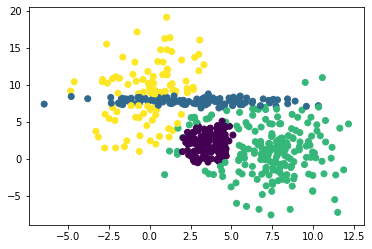

prob [[1.69885027e-03 2.40832665e-06 6.49888640e-07 ... 8.46290972e-01
  8.36648790e-01 8.17903707e-01]
 [2.56519207e-39 1.23409819e-51 2.80958201e-12 ... 6.50775225e-38
  2.92874725e-30 1.66345847e-22]
 [9.98283710e-01 9.99996663e-01 9.99991370e-01 ... 1.53304626e-01
  1.62670096e-01 1.80406385e-01]
 [1.74402125e-05 9.29024581e-07 7.97978478e-06 ... 4.04401148e-04
  6.81113962e-04 1.68990756e-03]]
theta new {'num_dims': 2, 'a': array([0.27414115, 0.1572422 , 0.39432651, 0.17429014]), 'mu': array([[3.86427642, 2.11976259],
       [2.72242774, 7.76330218],
       [6.87550129, 1.40645065],
       [0.01316081, 8.83529893]]), 'cov': array([[[ 0.5359837 ,  0.11434426],
        [ 0.11434426,  1.77886343]],

       [[10.20835779, -0.24270439],
        [-0.24270439,  0.16628599]],

       [[ 5.89645971, -1.15031943],
        [-1.15031943, 10.57864656]],

       [[ 3.3010757 ,  1.37867344],
        [ 1.37867344, 14.61466366]]])}
likelihood -3005.1720235166576
MONOTONIC: True
=== ITER 28 ===


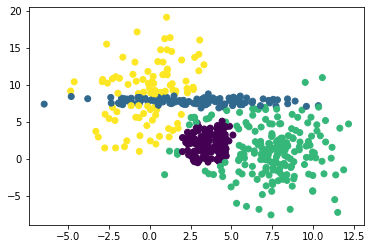

prob [[1.96079145e-03 3.20011871e-06 8.37199754e-07 ... 8.52009500e-01
  8.43398121e-01 8.27361678e-01]
 [9.02379800e-39 6.41423410e-51 4.27415942e-12 ... 2.06255744e-37
  7.36522228e-30 3.29379805e-22]
 [9.98015878e-01 9.99995484e-01 9.99988814e-01 ... 1.47495279e-01
  1.55780549e-01 1.70650503e-01]
 [2.33306633e-05 1.31565240e-06 1.03485711e-05 ... 4.95220299e-04
  8.21330520e-04 1.98781822e-03]]
theta new {'num_dims': 2, 'a': array([0.27889121, 0.15780972, 0.38683182, 0.17646724]), 'mu': array([[3.85713084, 2.12404659],
       [2.72751325, 7.76254427],
       [6.95059191, 1.36895617],
       [0.03437338, 8.78010231]]), 'cov': array([[[ 0.54754472,  0.11102764],
        [ 0.11102764,  1.80779181]],

       [[10.21507143, -0.24916064],
        [-0.24916064,  0.16844453]],

       [[ 5.6661529 , -1.02734125],
        [-1.02734125, 10.57991234]],

       [[ 3.31156092,  1.29135866],
        [ 1.29135866, 14.77318282]]])}
likelihood -3004.387206670909
MONOTONIC: True
=== ITER 29 ===


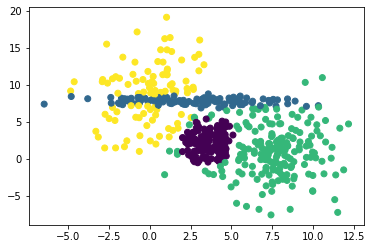

prob [[2.25162603e-03 4.19313828e-06 1.06774070e-06 ... 8.58470803e-01
  8.50929969e-01 8.37621615e-01]
 [2.73171847e-38 2.72933959e-50 6.14918584e-12 ... 5.71571409e-37
  1.66321006e-29 6.01865480e-22]
 [9.97717382e-01 9.99993962e-01 9.99985617e-01 ... 1.40926267e-01
  1.48085020e-01 1.60051974e-01]
 [3.09923600e-05 1.84517301e-06 1.33156483e-05 ... 6.02929813e-04
  9.85011002e-04 2.32641047e-03]]
theta new {'num_dims': 2, 'a': array([0.2839096 , 0.15833844, 0.37912622, 0.17862574]), 'mu': array([[3.85058677, 2.12812288],
       [2.73152648, 7.76188357],
       [7.02986247, 1.33086703],
       [0.05595229, 8.72535811]]), 'cov': array([[[ 0.55884575,  0.10785757],
        [ 0.10785757,  1.83930671]],

       [[10.2161585 , -0.25452949],
        [-0.25452949,  0.17041562]],

       [[ 5.42048582, -0.89873425],
        [-0.89873425, 10.58697995]],

       [[ 3.32348604,  1.20258287],
        [ 1.20258287, 14.93525276]]])}
likelihood -3003.5204211907158
MONOTONIC: True
=== ITER 30 ===


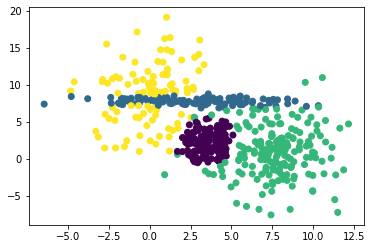

prob [[2.57113170e-03 5.40774669e-06 1.34679524e-06 ... 8.65775591e-01
  8.59346970e-01 8.48771034e-01]
 [7.37288909e-38 9.95849625e-50 8.47156672e-12 ... 1.42963010e-36
  3.45944553e-29 1.03427130e-21]
 [9.97387984e-01 9.99992030e-01 9.99981654e-01 ... 1.33494725e-01
  1.39478410e-01 1.48520705e-01]
 [4.08846875e-05 2.56214355e-06 1.69993215e-05 ... 7.29684709e-04
  1.17462045e-03 2.70826087e-03]]
theta new {'num_dims': 2, 'a': array([0.28920547, 0.15884655, 0.37120656, 0.18074141]), 'mu': array([[3.8448284 , 2.13191954],
       [2.73476778, 7.76128585],
       [7.11335564, 1.29207381],
       [0.07771209, 8.67148558]]), 'cov': array([[[ 0.56972395,  0.1049099 ],
        [ 0.1049099 ,  1.8735775 ]],

       [[10.21233204, -0.25901411],
        [-0.25901411,  0.17225258]],

       [[ 5.15908529, -0.76478419],
        [-0.76478419, 10.59905641]],

       [[ 3.33695993,  1.11318899],
        [ 1.11318899, 15.10153584]]])}
likelihood -3002.559732289965
MONOTONIC: True
=== ITER 31 ===


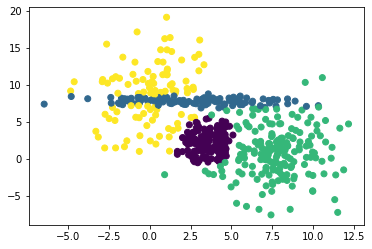

prob [[2.91857241e-03 6.85313960e-06 1.67829567e-06 ... 8.74011976e-01
  8.68728713e-01 8.60852909e-01]
 [1.83484868e-37 3.25547751e-49 1.13076428e-11 ... 3.32626730e-36
  6.78936287e-29 1.70167731e-21]
 [9.97027934e-01 9.99989631e-01 9.99976818e-01 ... 1.25111196e-01
  1.29879992e-01 1.36014148e-01]
 [5.34939781e-05 3.51558968e-06 2.15036481e-05 ... 8.76828087e-04
  1.39129519e-03 3.13294278e-03]]
theta new {'num_dims': 2, 'a': array([0.29477526, 0.15935209, 0.36309805, 0.18277459]), 'mu': array([[3.8400782 , 2.13531394],
       [2.7374947 , 7.7607208 ],
       [7.20077281, 1.25266554],
       [0.09931251, 8.61921696]]), 'cov': array([[[ 0.57998449,  0.10225481],
        [ 0.10225481,  1.91072692]],

       [[10.20428192, -0.26282562],
        [-0.26282562,  0.1740125 ]],

       [[ 4.8829132 , -0.62656493],
        [-0.62656493, 10.61554141]],

       [[ 3.35198622,  1.02460965],
        [ 1.02460965, 15.2717409 ]]])}
likelihood -3001.4988761321993
MONOTONIC: True
=== ITER 32 ===


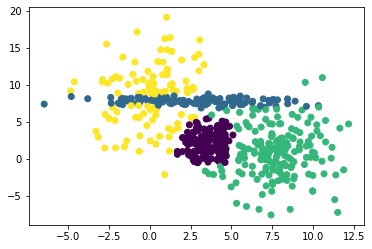

prob [[3.29241875e-03 8.52011362e-06 2.06325984e-06 ... 8.83230732e-01
  8.79105013e-01 8.73834622e-01]
 [4.34770912e-37 9.94201791e-49 1.47865893e-11 ... 7.40803528e-36
  1.28630679e-28 2.72643559e-21]
 [9.96638334e-01 9.99986730e-01 9.99971052e-01 ... 1.15725258e-01
  1.19261329e-01 1.22570336e-01]
 [6.92473767e-05 4.74977250e-06 2.68844836e-05 ... 1.04400926e-03
  1.63365809e-03 3.59504237e-03]]
theta new {'num_dims': 2, 'a': array([0.30059097, 0.15987232, 0.35486587, 0.18467084]), 'mu': array([[3.8365962 , 2.13813555],
       [2.73994279, 7.76016065],
       [7.29128971, 1.21295101],
       [0.12025114, 8.56965345]]), 'cov': array([[[ 0.5894018 ,  0.09994906],
        [ 0.09994906,  1.95077765]],

       [[10.19275333, -0.26618849],
        [-0.26618849,  0.17575509]],

       [[ 4.59503927, -0.48602737],
        [-0.48602737, 10.63584334]],

       [[ 3.36842935,  0.93891659],
        [ 0.93891659, 15.44362756]]])}
likelihood -3000.3434200636157
MONOTONIC: True
=== ITER 33 ===


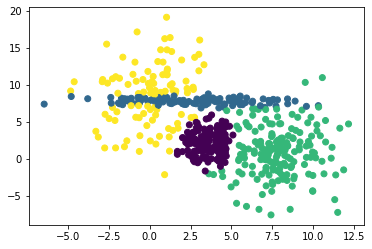

prob [[3.69039265e-03 1.03752384e-05 2.49809360e-06 ... 8.93402637e-01
  8.90411419e-01 8.87560968e-01]
 [1.01123424e-36 2.95113568e-48 1.91456665e-11 ... 1.62237268e-35
  2.40372474e-28 4.32221475e-21]
 [9.96221244e-01 9.99983338e-01 9.99964400e-01 ... 1.05369346e-01
  1.07692243e-01 1.08357096e-01]
 [8.83632792e-05 6.28685329e-06 3.31019772e-05 ... 1.22801707e-03
  1.89633778e-03 4.08193617e-03]]
theta new {'num_dims': 2, 'a': array([0.30658598, 0.16042246, 0.3466269 , 0.18636467]), 'mu': array([[3.83465218, 2.14018221],
       [2.7423472 , 7.75957876],
       [7.38335798, 1.17346437],
       [0.1398806 , 8.52427823]]), 'cov': array([[[ 0.59775044,  0.09802292],
        [ 0.09802292,  1.99356953]],

       [[10.17864326, -0.26934621],
        [-0.26934621,  0.17754061]],

       [[ 4.3014838 , -0.34599273],
        [-0.34599273, 10.65914584]],

       [[ 3.38596992,  0.85878363],
        [ 0.85878363, 15.61193549]]])}
likelihood -2999.1190181388965
MONOTONIC: True
=== ITER 34 ===


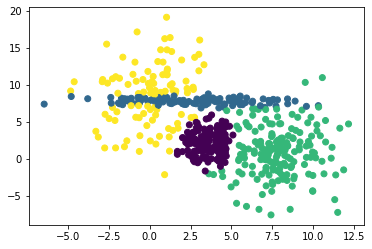

prob [[4.11030168e-03 1.23628498e-05 2.97406023e-06 ... 9.04358392e-01
  9.02429562e-01 9.01699374e-01]
 [2.37456453e-36 8.83199969e-48 2.47953332e-11 ... 3.58023956e-35
  4.51774876e-28 6.87851184e-21]
 [9.95779054e-01 9.99979535e-01 9.99957056e-01 ... 9.42199891e-02
  9.54018150e-02 9.37284289e-02]
 [1.10644597e-04 8.10217295e-06 3.99699240e-05 ... 1.42161862e-03
  2.16862288e-03 4.57219688e-03]]
theta new {'num_dims': 2, 'a': array([0.31264171, 0.16101358, 0.3385556 , 0.1877891 ]), 'mu': array([[3.83445838, 2.14126117],
       [2.74496096, 7.75894881],
       [7.47459131, 1.13494467],
       [0.15747211, 8.48480302]]), 'cov': array([[[ 0.60487362,  0.09646557],
        [ 0.09646557,  2.0386415 ]],

       [[10.1631075 , -0.27256409],
        [-0.27256409,  0.17942605]],

       [[ 4.01162067, -0.21002585],
        [-0.21002585, 10.68412852]],

       [[ 3.40404051,  0.787239  ],
        [ 0.787239  , 15.76831889]]])}
likelihood -2997.878184177209
MONOTONIC: True
=== ITER 35 ===


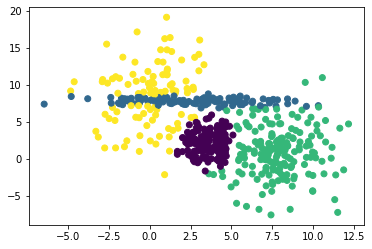

prob [[4.55186621e-03 1.44223145e-05 3.47988831e-06 ... 9.15730381e-01
  9.14734773e-01 9.15707371e-01]
 [5.76610428e-36 2.75017640e-47 3.24167621e-11 ... 8.12519943e-35
  8.68020302e-28 1.11231041e-20]
 [9.95312854e-01 9.99975476e-01 9.99949392e-01 ... 8.26564058e-02
  8.28309079e-02 7.92561970e-02]
 [1.35279813e-04 1.01013311e-05 4.71279908e-05 ... 1.61321315e-03
  2.43431903e-03 5.03643210e-03]]
theta new {'num_dims': 2, 'a': array([0.31858281, 0.16165019, 0.33087456, 0.18889244]), 'mu': array([[3.83606712, 2.14125896],
       [2.74805463, 7.7582462 ],
       [7.56190146, 1.09828383],
       [0.17234438, 8.45271878]]), 'cov': array([[[ 0.61077216,  0.09521649],
        [ 0.09521649,  2.08509227]],

       [[10.14765481, -0.27612414],
        [-0.27612414,  0.18145885]],

       [[ 3.73730684, -0.08222048],
        [-0.08222048, 10.70875482]],

       [[ 3.42175695,  0.7270871 ],
        [ 0.7270871 , 15.90367827]]])}
likelihood -2996.6978085891296
MONOTONIC: True
=== ITER 36 ===


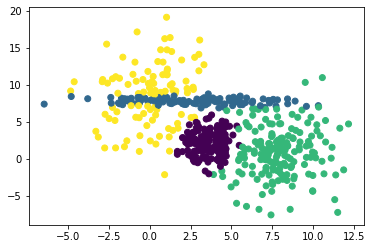

prob [[5.01863752e-03 1.65197056e-05 4.00815355e-06 ... 9.26946948e-01
  9.26703996e-01 9.28878550e-01]
 [1.47267113e-35 9.11595240e-47 4.31036166e-11 ... 1.92280401e-34
  1.72403434e-27 1.84310771e-20]
 [9.94820572e-01 9.99971362e-01 9.99941921e-01 ... 7.12645675e-02
  7.06217591e-02 6.56788469e-02]
 [1.60790348e-04 1.21187434e-05 5.40710986e-05 ... 1.78848458e-03
  2.67424505e-03 5.44260274e-03]]
theta new {'num_dims': 2, 'a': array([0.32419275, 0.16232839, 0.32382198, 0.18965688]), 'mu': array([[3.83927583, 2.14022081],
       [2.75187325, 7.75745368],
       [7.64199857, 1.06442093],
       [0.18403912, 8.42868028]]), 'cov': array([[[ 0.61565522,  0.09417061],
        [ 0.09417061,  2.13148866]],

       [[10.13415171, -0.2803036 ],
        [-0.2803036 ,  0.18366845]],

       [[ 3.49034681,  0.03320223],
        [ 0.03320223, 10.7303863 ]],

       [[ 3.43793712,  0.68011267],
        [ 0.68011267, 16.012316  ]]])}
likelihood -2995.660963591649
MONOTONIC: True
=== ITER 37 ===


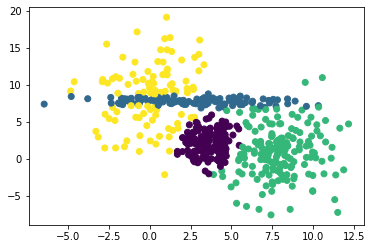

prob [[5.51767633e-03 1.86747464e-05 4.56169558e-06 ... 9.37337184e-01
  9.37639190e-01 9.40508273e-01]
 [3.98051719e-35 3.24746301e-46 5.85443954e-11 ... 4.76603394e-34
  3.55289882e-27 3.13891038e-20]
 [9.94297072e-01 9.99967371e-01 9.99935188e-01 ... 6.07284754e-02
  5.94892786e-02 5.37264083e-02]
 [1.85251564e-04 1.39541098e-05 6.02500325e-05 ... 1.93434020e-03
  2.87153099e-03 5.76531849e-03]]
theta new {'num_dims': 2, 'a': array([0.32925682, 0.16303612, 0.31760129, 0.19010578]), 'mu': array([[3.84361518, 2.13838934],
       [2.7565483 , 7.75657078],
       [7.71213105, 1.03415492],
       [0.19245998, 8.41221009]]), 'cov': array([[[ 0.61988514,  0.09320042],
        [ 0.09320042,  2.17595544]],

       [[10.12459437, -0.28532834],
        [-0.28532834,  0.18605775]],

       [[ 3.27935699,  0.13272144],
        [ 0.13272144, 10.74641692]],

       [[ 3.4513333 ,  0.6465359 ],
        [ 0.6465359 , 16.09439628]]])}
likelihood -2994.82855153233
MONOTONIC: True
=== ITER 38 ===


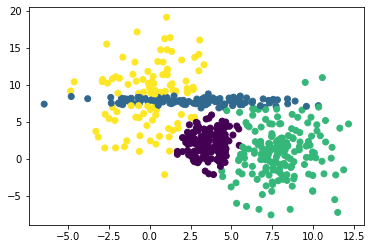

prob [[6.05512548e-03 2.09548433e-05 5.15313070e-06 ... 9.46331104e-01
  9.46980113e-01 9.50120554e-01]
 [1.13023177e-34 1.23417301e-45 8.12029389e-11 ... 1.22873650e-33
  7.55603235e-27 5.47411371e-20]
 [9.93738128e-01 9.99963610e-01 9.99929636e-01 ... 5.16257927e-02
  5.00029476e-02 4.38855804e-02]
 [2.06746724e-04 1.54349098e-05 6.52103973e-05 ... 2.04310281e-03
  3.01693971e-03 5.99386522e-03]]
theta new {'num_dims': 2, 'a': array([0.33361852, 0.16375561, 0.31233342, 0.19029245]), 'mu': array([[3.8484607 , 2.13615318],
       [2.762018  , 7.75562124],
       [7.77071931, 1.00793693],
       [0.19787889, 8.40201503]]), 'cov': array([[[ 0.62382412,  0.09219327],
        [ 0.09219327,  2.21653561]],

       [[10.12058743, -0.29130631],
        [-0.29130631,  0.18859861]],

       [[ 3.1078883 ,  0.21455224],
        [ 0.21455224, 10.75517113]],

       [[ 3.46102134,  0.62512834],
        [ 0.62512834, 16.15445198]]])}
likelihood -2994.2186688974716
MONOTONIC: True
=== ITER 39 ===


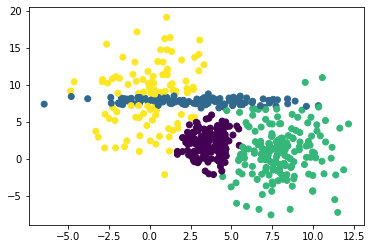

prob [[6.62933917e-03 2.34301738e-05 5.79515429e-06 ... 9.53633062e-01
  9.54472844e-01 9.57603086e-01]
 [3.30236168e-34 4.88298433e-45 1.14399460e-10 ... 3.23599818e-33
  1.63492048e-26 9.67581380e-20]
 [9.93146827e-01 9.99960104e-01 9.99925502e-01 ... 4.42529157e-02
  4.24166672e-02 3.62637861e-02]
 [2.23833816e-04 1.64661452e-05 6.87023027e-05 ... 2.11402270e-03
  3.11048872e-03 6.13312744e-03]]
theta new {'num_dims': 2, 'a': array([0.33721685, 0.16446725, 0.30803587, 0.19028003]), 'mu': array([[3.85321194, 2.1339176 ],
       [2.768026  , 7.75465069],
       [7.81758501, 0.98578869],
       [0.20080769, 8.39658179]]), 'cov': array([[[ 0.62768864,  0.09108942],
        [ 0.09108942,  2.25170197]],

       [[10.12277886, -0.2981754 ],
        [-0.2981754 ,  0.19123532]],

       [[ 2.97456225,  0.27909421],
        [ 0.27909421, 10.75644397]],

       [[ 3.46667463,  0.61383629],
        [ 0.61383629, 16.19811994]]])}
likelihood -2993.807526567978
MONOTONIC: True
=== ITER 40 ===


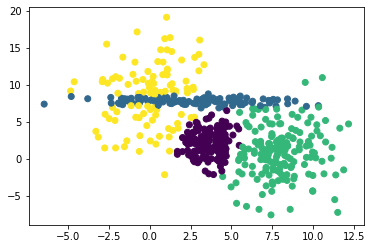

prob [[7.22648305e-03 2.61193444e-05 6.48831717e-06 ... 9.59254652e-01
  9.60182943e-01 9.63163105e-01]
 [9.64190904e-34 1.93949836e-44 1.62152930e-10 ... 8.48866312e-33
  3.52748577e-26 1.70792800e-19]
 [9.92537701e-01 9.99956841e-01 9.99922803e-01 ... 3.85937541e-02
  3.66581318e-02 3.06390574e-02]
 [2.35815924e-04 1.70400439e-05 7.07081657e-05 ... 2.15159415e-03
  3.15892527e-03 6.19783801e-03]]
theta new {'num_dims': 2, 'a': array([0.34008399, 0.16515314, 0.30463624, 0.19012664]), 'mu': array([[3.85743418, 2.13197856],
       [2.77420509, 7.75371421],
       [7.85372755, 0.96739747],
       [0.20183194, 8.39457767]]), 'cov': array([[[ 0.63150882,  0.08989532],
        [ 0.08989532,  2.28072918]],

       [[10.13066119, -0.3057071 ],
        [-0.3057071 ,  0.19389553]],

       [[ 2.87457499,  0.32843788],
        [ 0.32843788, 10.75134665]],

       [[ 3.46855237,  0.61041397],
        [ 0.61041397, 16.23008196]]])}
likelihood -2993.548167309733
MONOTONIC: True


In [86]:
alg.fit(data)